In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from numpy import inf
from sklearn.linear_model import LinearRegression

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.

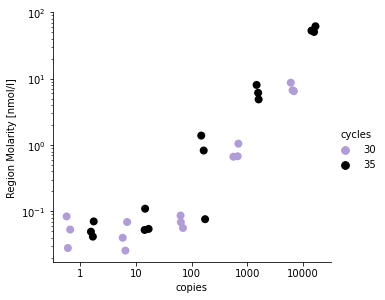

In [2]:
quant = []
for root, dirs, files in os.walk('../bshih/20210122_wgs_reextract/', topdown=True):
    for i in files:
        if re.search(r'.*compactRegionTable.csv', i):
            quant.append(pd.read_csv(root + '/' + i, encoding= 'unicode_escape'))

everything = pd.concat(quant).dropna(how='all', axis=1).reset_index(drop=True)
twist = everything[everything['FileName'].str.contains(r'.*twistdilution.*')]
twist.loc[:, 'cycles'] = twist['Sample Description'].str.split('_').str[0]
twist.loc[:, 'copies'] = twist['Sample Description'].str.split('_').str[1].astype('int')
twist.loc[:, 'total (ng)'] = twist['Conc. [ng/µl]'] * 50

g = sns.catplot(y="Region Molarity [nmol/l]", x="copies",
                orient="v", height=4, aspect=1.1,
                data=twist, hue='cycles', 
                palette=['#b19cd9', 'black'], linewidth=0, jitter=True, s=8, dodge=True)

plt.yscale('log')
plt.ylim(0, 100)
plt.show()

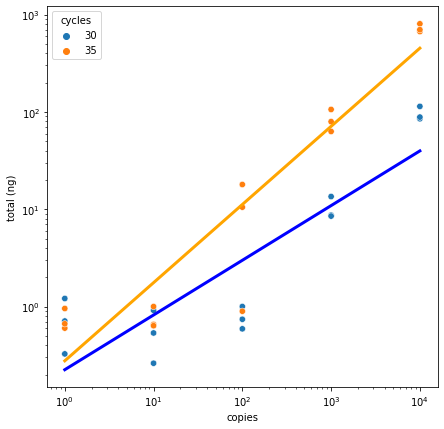

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x='copies', y='total (ng)', hue='cycles', data=twist, s=40)

x = twist[twist['cycles'] == '35']['copies'].values
y = twist[twist['cycles'] == '35']['total (ng)'].values

new_x, new_y = zip(*sorted(zip(x, y)))

logA = np.log(new_x)
logB = np.log(new_y)

m, c = np.polyfit(logA, logB, 1)
y_fit = np.exp(m*logA + c)
plt.plot(new_x, y_fit, 'orange', linewidth=3)

x = twist[twist['cycles'] == '30']['copies'].values
y = twist[twist['cycles'] == '30']['total (ng)'].values

new_x, new_y = zip(*sorted(zip(x, y)))

logA = np.log(new_x)
logB = np.log(new_y)

m, c = np.polyfit(logA, logB, 1)
y_fit = np.exp(m*logA + c)
plt.plot(new_x, y_fit, 'b', linewidth=3)

plt.yscale('log')
plt.xscale('log')

In [4]:
g19_scores = [0.02689, 0.0409, 0.16256, 1.65801, 5.40689, 6.37723, 21.46693, 27.33299, 111.51012, 27937.5, 31703, 51759, 0, 0, 0]
g19_scores.extend(g19_scores)

reextract = everything[everything['FileName'].str.contains(r'.*reextract.*')]
reextract = reextract[~reextract['Sample Description'].str.contains(r'^.*(NTC|Positive)')]
reextract.loc[:, 'g19_score'] = g19_scores
reextract['copies'] = reextract['Sample Description'].str.extract('^.*\s-\s(.*)$')
reextract['pool'] = reextract['Sample Description'].str.extract('^Pool(\d).*$')
reextract.loc[:, 'total (ng)'] = reextract['Conc. [ng/µl]'].astype('float')*25
reextract = reextract.query("g19_score > 0")

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


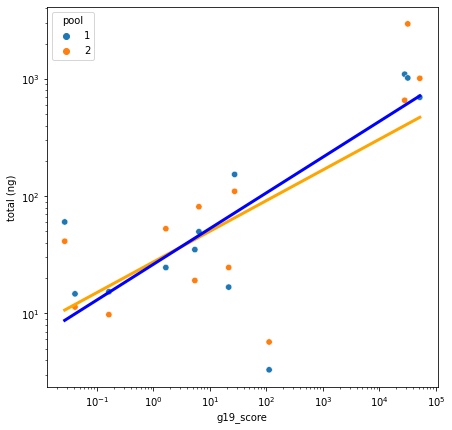

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.scatterplot(x='g19_score', y='total (ng)', hue='pool', data=reextract, s=40)

x = reextract[(reextract['pool'] == '1')]['g19_score'].values
y = reextract[reextract['pool'] == '1']['total (ng)'].values

new_x, new_y = zip(*sorted(zip(x, y)))

logA = np.log(new_x)
logB = np.log(new_y)

m, c = np.polyfit(logA, logB, 1)
y_fit = np.exp(m*logA + c)
plt.plot(new_x, y_fit, 'orange', linewidth=3)

x = reextract[reextract['pool'] == '2']['g19_score'].values
y = reextract[reextract['pool'] == '2']['total (ng)'].values

new_x, new_y = zip(*sorted(zip(x, y)))

logA = np.log(new_x)
logB = np.log(new_y)

m, c = np.polyfit(logA, logB, 1)
y_fit = np.exp(m*logA + c)
plt.plot(new_x, y_fit, 'b', linewidth=3)

plt.yscale('log')
plt.xscale('log')

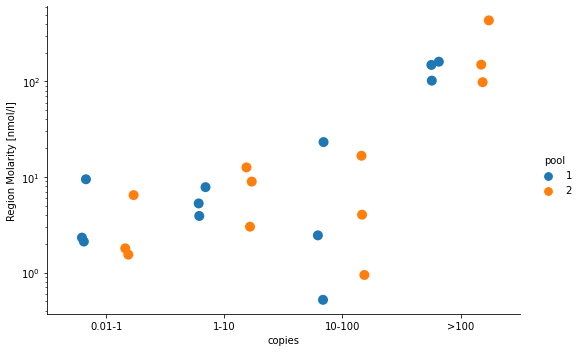

In [6]:
g = sns.catplot(y="Region Molarity [nmol/l]", x="copies",
                orient="v", height=5, aspect=1.5,s=10,
                data=reextract, hue='pool', linewidth=0,
                dodge=True)

plt.yscale('log')
g.tight_layout()
plt.show()